http://ithelp.ithome.com.tw/articles/10187191

# 建立決策樹分類器

決策樹分類器（Decision Tree Classifiers）是可以處理多元分類問題的演算法，我們最喜歡她的地方有兩點：

+ 可以同時處理連續型與類別型變數。
+ 不需要進行太多的資料預處理（Preprocessing），
> 像是在建立 Logistic 迴歸前得將 Sex 變數創造成 dummy variables，但是決策樹分類器不需要。

R

我們使用 rpart 套件的 rpart() 函數。

In [4]:
library(rpart)

# 切分訓練與測試資料
n <- nrow(iris)
shuffled_iris <- iris[sample(n), ]
train_indices <- 1:round(0.7 * n)
train_iris <- shuffled_iris[train_indices, ]
test_indices <- (round(0.7 * n) + 1):n
test_iris <- shuffled_iris[test_indices, ]

# 建立分類器
iris_clf <- rpart(Species ~ ., data = train_iris, method = "class")

# 預測
test_iris_predicted = predict(iris_clf, test_iris, type = "class")
print(test_iris_predicted)

# 標準答案
print(test_iris$Species)

iris

        89        100        116         61         88         83         92 
versicolor versicolor  virginica versicolor versicolor versicolor versicolor 
       110         19        105         43         15         59        129 
 virginica     setosa  virginica     setosa     setosa versicolor  virginica 
       126         80         44        115         46         29         27 
 virginica versicolor     setosa  virginica     setosa     setosa     setosa 
       149         64         93         17         84         79         21 
 virginica versicolor versicolor     setosa versicolor versicolor     setosa 
        37         98         16        147          9         55        128 
    setosa versicolor     setosa  virginica     setosa versicolor  virginica 
       135        114         66         99        107        113        143 
versicolor  virginica versicolor versicolor versicolor  virginica  virginica 
       104        106        109 
 virginica  virginica  virgini

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


# 決策樹分類器的績效

我們使用準確率（Accuracy）作為分類演算法的績效。

我們透過 confusion matrix 來計算準確率。

In [5]:
# 績效
conf_mat <- table(test_iris$Species, test_iris_predicted)
accuracy <- sum(diag(conf_mat)) / sum(conf_mat)
accuracy

[1] 0.9555556

# 建立 k-Nearest Neighbors 分類器

k-Nearest Neighbors 分類器同樣也是可以處理多元分類問題的演算法，

由於是以距離作為未知類別的資料點分類依據，

必須要將類別變數轉換為 dummy variables 然後將所有的數值型變數標準化，

避免因為單位不同，在距離的計算上失真。

我們使用 class 套件的 knn() 函數，指定參數 k = 5。

In [6]:
library(class)

# 切分訓練與測試資料
n <- nrow(iris)
shuffled_iris <- iris[sample(n), ]
train_indices <- 1:round(0.7 * n)
train_iris <- shuffled_iris[train_indices, ]
test_indices <- (round(0.7 * n) + 1):n
test_iris <- shuffled_iris[test_indices, ]

# 獨立 X 與 y
train_iris_X <- train_iris[, -5]
test_iris_X <- test_iris[, -5]
train_iris_y <- train_iris[, 5]
test_iris_y <- test_iris[, 5]

# 預測
test_y_predicted <- knn(train = train_iris_X, test = test_iris_X, cl = train_iris_y, k = 5)
test_y_predicted

# 標準答案
print(test_iris_y)

[1] setosa     setosa     setosa     virginica  virginica  virginica 
 [7] virginica  virginica  virginica  virginica  versicolor virginica 
[13] virginica  virginica  virginica  setosa     virginica  setosa    
[19] setosa     virginica  setosa     virginica  setosa     versicolor
[25] setosa     versicolor virginica  virginica  virginica  setosa    
[31] setosa     setosa     setosa     versicolor virginica  setosa    
[37] setosa     versicolor versicolor setosa     versicolor versicolor
[43] versicolor setosa     versicolor
Levels: setosa versicolor virginica

 [1] setosa     setosa     setosa     virginica  virginica  virginica 
 [7] virginica  virginica  virginica  virginica  versicolor virginica 
[13] virginica  virginica  virginica  setosa     virginica  setosa    
[19] setosa     virginica  setosa     virginica  setosa     versicolor
[25] setosa     versicolor virginica  virginica  virginica  setosa    
[31] setosa     setosa     setosa     versicolor virginica  setosa    
[37] setosa     versicolor versicolor setosa     versicolor versicolor
[43] versicolor setosa     versicolor
Levels: setosa versicolor virginica


# 如何選擇 k

讓程式幫我們怎麼選擇一個適合的 k，通常 k 的上限為訓練樣本數的 20%。

[1] 10

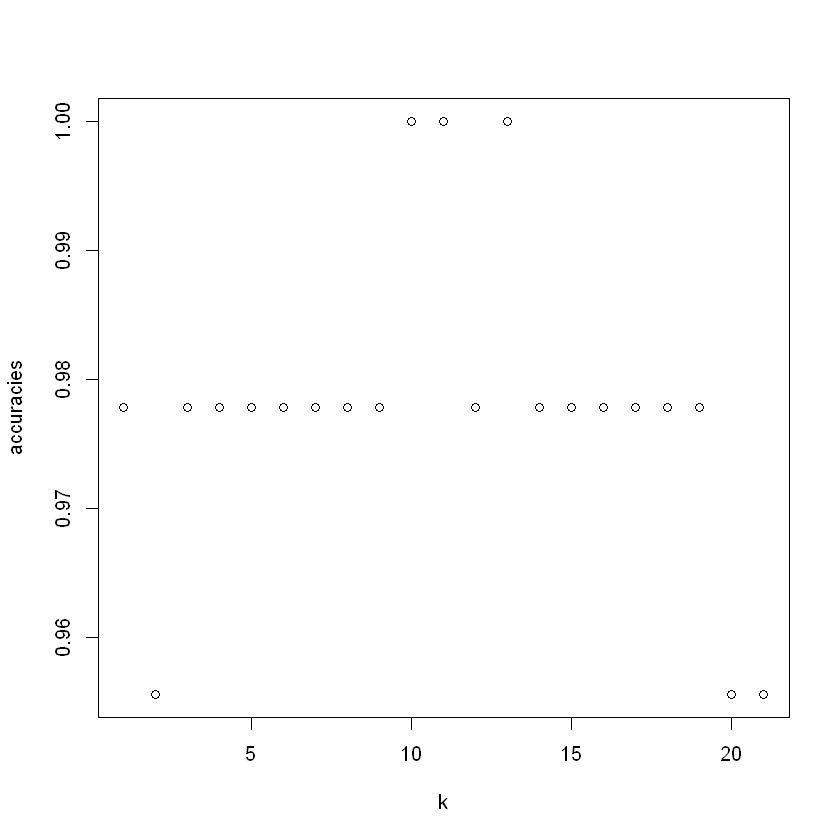

In [9]:
library(class)

# 切分訓練與測試資料
n <- nrow(iris)
shuffled_iris <- iris[sample(n), ]
train_indices <- 1:round(0.7 * n)
train_iris <- shuffled_iris[train_indices, ]
test_indices <- (round(0.7 * n) + 1):n
test_iris <- shuffled_iris[test_indices, ]

# 獨立 X 與 y
train_iris_X <- train_iris[, -5]
test_iris_X <- test_iris[, -5]
train_iris_y <- train_iris[, 5]
test_iris_y <- test_iris[, 5]

# 選擇 k
range <- 1:round(0.2 * nrow(train_iris_X))
accuracies <- rep(NA, length(range))

for (i in range) {
  test_y_predicted <- knn(train = train_iris_X, test = test_iris_X, cl = train_iris_y, k = i)
  conf_mat <- table(test_iris_y, test_y_predicted)
  accuracies[i] <- sum(diag(conf_mat))/sum(conf_mat)
}

# 視覺化
plot(range, accuracies, xlab = "k")
which.max(accuracies)